# **Week 8 Activity**

### Tasks

1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether  test preparation helps the students?

## T1. Carry out descriptive analytics on the dataset.

In [2]:
# NumPy Library as np
import numpy as np
# Pandas Library as 'pd'
import pandas as pd
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Seaborn Library as 'sns'
import seaborn as sns
# SciKit Learn library itself and pearsonr from it
import scipy

In [3]:
# Reading the Data from the CSV file
TEST_DATA = pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
TEST_DATA.sample(5)

,Gender,Test preparation,Total Marks
24,female,none,27
22,female,none,41
8,male,none,18
10,male,completed,44
3,female,none,48


In [9]:
# Information regarding the Data
TEST_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [75]:
# Getting statistical details
TEST_DATA.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [10]:
# Getting Nullvalue count
TEST_DATA.isna().sum().to_frame('Null value count')

,Null value count
Gender,0
Test preparation,0
Total Marks,0


In [70]:
# To find the gender count using 'value_counts' method.
TEST_DATA['Test preparation'].value_counts().to_frame('Test preparation count')

,Test preparation count
none,21
completed,7


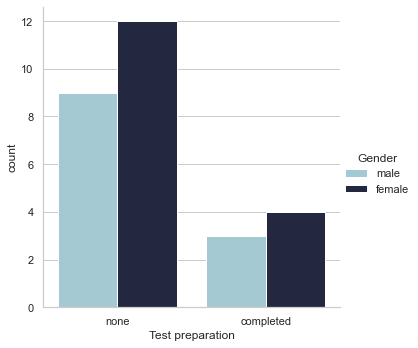

In [53]:
# Category plot
sns.catplot(x="Test preparation", hue="Gender", kind="count", palette="ch:rot=-.2,hue=1,light=.75", data=TEST_DATA)

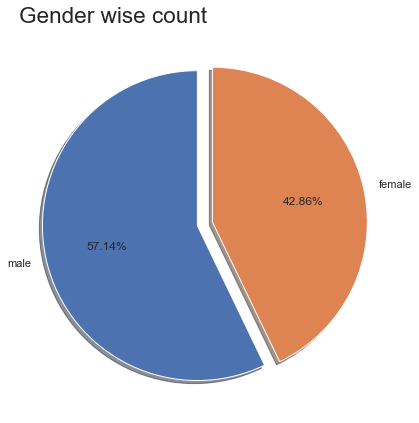

In [68]:
# Variable for plot
explode = (0.1, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(7.125,7.125))
plt.pie(TEST_DATA.loc[:,['Gender']].groupby('Gender').size(), explode=explode,  shadow=True, startangle=90, labels = list(TEST_DATA['Gender'].unique()), autopct='%1.2f%%')
plt.title(label="Gender wise count",
          loc="left",
          fontsize=22.5)

plt.show()

In [74]:
F=((TEST_DATA.Gender == 'female') & (TEST_DATA['Test preparation'] == 'completed')).sum()
M=((TEST_DATA.Gender == 'male') & (TEST_DATA['Test preparation'] == 'completed')).sum()
print(F,"females and",M,"males have compleated the test preparation.")

4 females and 3 males have compleated the test preparation.


### Insights :
* No null values present in the Data.
* The dataset contains the details of the students such as - Gender, Test Preparation, Total marks.
* **28 Observations** and **3 Features** are found.
* Most of the students are **Male**.
* As visible from the above plots, we can see that a few have completed Test preparation course.
* Among the students, female students are out numbered than males in both completing as well as not completing the test preparation course.
* The range of the totalmarks is 12-50.

## T2. Check whether female and male students scored the same marks.

In [76]:
TEST_DATA[['Total Marks','Gender']].groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

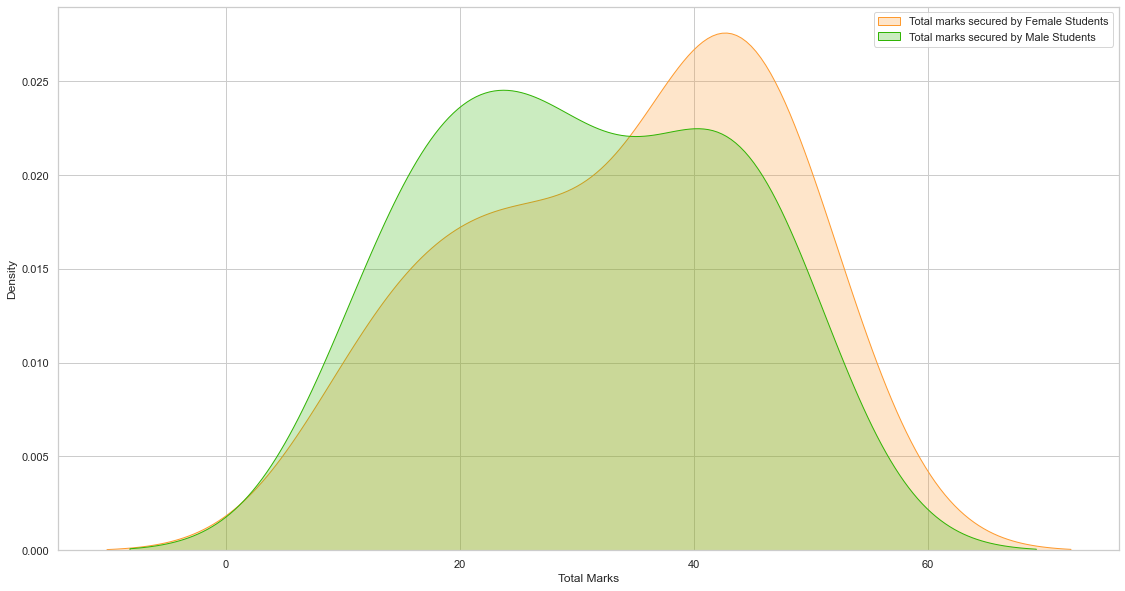

In [84]:
# Defining variables
sample_female=TEST_DATA[(TEST_DATA.Gender == 'female')]
sample_male=TEST_DATA[(TEST_DATA.Gender == 'male')]
# Plotting a kde plot for the features Total Marks Vs Gender
plt.figure(figsize=(19, 10))
sns.kdeplot(sample_female['Total Marks'], label="Total marks secured by Female Students", shade = True, color = '#FE9A2E')
sns.kdeplot(sample_male['Total Marks'], label="Total marks secured by Male Students", shade = True, color = '#31B404')
plt.legend()

### Defining Hypothesis and choosing a testing method :
*   The Null Hypothesis, ***H(0) : Female and Male students scored same marks***
*   The Alternative Hypothesis, ***H(a) : Female and Male students scored different marks***
*   Significance level = 5%
*   Here, we are doing **Two Tailed T - Test**

In [85]:
# Importing stats from SciPy library
from scipy import stats
ttest,pval = stats.ttest_ind(sample_female['Total Marks'], sample_male['Total Marks'], alternative='two-sided')
print('Test statistic is:',ttest)
print('P-value for Two tailed test is:', pval)
if(pval<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

Test statistic is: 0.6940885268848668
P-value for Two tailed test is: 0.4937822317960763
We accept null hypothesis


### Conclusion :
Since the **P-Value is greater than the level of significance** , we accept our Null Hypothesis. Thus, we conclude that - **Female and Male students scored the same marks**.

## T3. Whether  test preparation helps the students?

In [86]:
TEST_DATA[['Total Marks','Test preparation']].groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

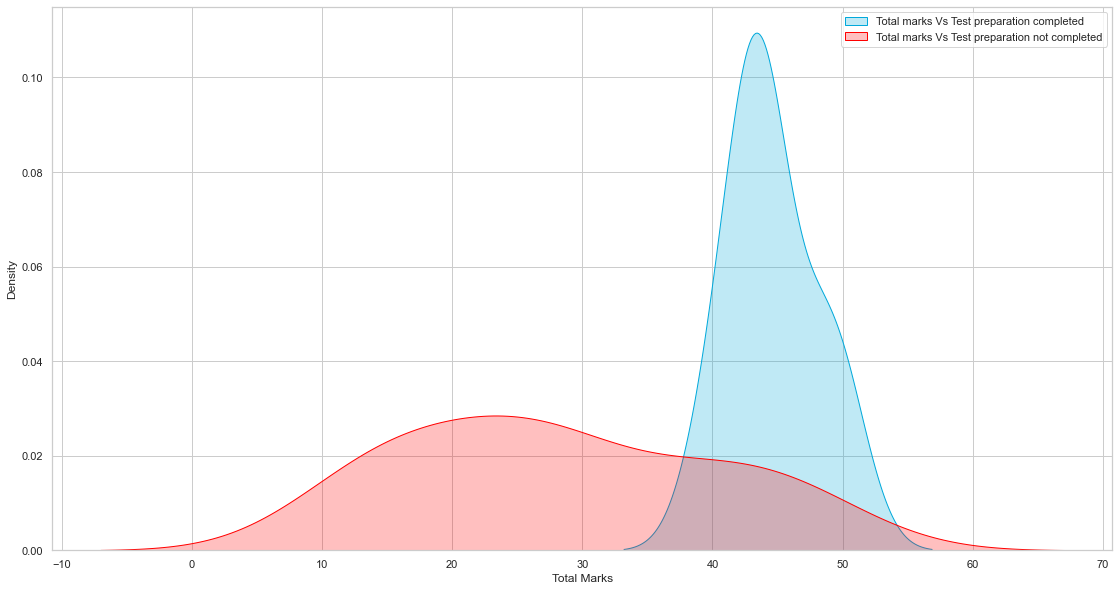

In [87]:
# Defining variables
sample_completed=TEST_DATA[(TEST_DATA['Test preparation'] == 'completed')]
sample_none=TEST_DATA[(TEST_DATA['Test preparation'] == 'none')]

# Plotting a kde plot for the features Total Marks Vs Test Preparation
plt.figure(figsize=(19, 10))
sns.kdeplot(sample_completed['Total Marks'], label="Total marks Vs Test preparation completed", shade = True, color = '#01A9DB')
sns.kdeplot(sample_none['Total Marks'], label="Total marks Vs Test preparation not completed", shade = True, color = '#FF0000')
plt.legend()

### Defining Hypothesis and choosing a testing method :
*   The Null Hypothesis, ***H(0) : The Test preparation didn't helped the students***
*   The Alternative Hypothesis, ***H(a) : The Test preparation helped the students***
*   Significance level = 5%
*   Here, We are doing **One Tailed T Test**

In [88]:
ttest,pval = stats.ttest_ind(sample_completed['Total Marks'], sample_none['Total Marks'], alternative='greater')
print('Test statistic is:',ttest)
print('P-value for One tailed test is:', pval)
if(pval<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

Test statistic is: 3.6143637527769217
P-value for One tailed test is: 0.0006335646228660053
We reject null hypothesis


### Conclusion :
Since the **P-value is smaller than the significance level**, we accept our Alternative Hypothesis. Thus, We conclude that - **The Test preparation helped the students**.